# Floodplains module

Niche Vlaanderen also contains a module to model the influence of flooding more precisely. This is done using the FloodPlain class. 

The first step is importing the `niche_vlaanderen` module. For convenience, we will be importing as `nv`.

In [1]:
import niche_vlaanderen as nv

Here the FloodPlain class is created. Like in Niche Vlaanderen, when creating the class, the model with its codetables is iniitialized.

In [2]:
fp = nv.FloodPlain()

The calculate method of the class takes four arguments: the depths (as grid), frequency, period and duration.

In [3]:
fp.calculate(depth_file="../testcase/floodplains/ff_bt_t10_h.asc",
             frequency="T10", period="winter", duration=1)

The results can be plotted per vegetation type. Note that not all vegetation types of Niche are supported by the floodplains module.

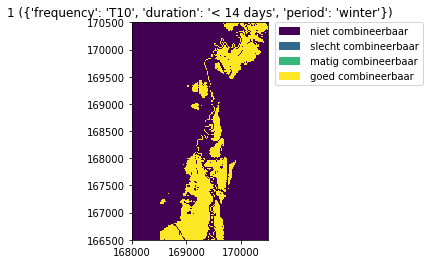

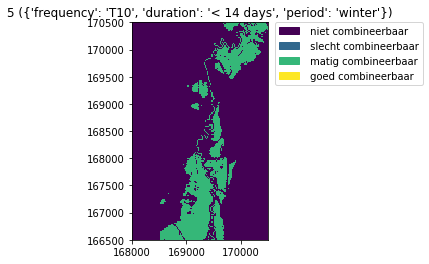

In [4]:
fp.plot(1)
fp.plot(5)
import matplotlib.pyplot as plt
plt.show()

Vergelijkbaar met de niche module kan de write methode gebruikt worden om de grids weg te schrijven.

In [5]:
fp.write("_output")

De output van een niche model kan ook met die van Floodplains gecombineerd worden.

In [6]:
myniche = nv.Niche()
input = "../testcase/dijle/"
myniche.set_input("soil_code", input +"bodemv.asc")
myniche.set_input("msw", input +"gvg_0_cm.asc")
myniche.set_input("mlw", input +"glg_0_cm.asc")
myniche.set_input("mhw", input +"ghg_0_cm.asc")
myniche.set_input("seepage", input +"kwel_mm_dag.asc")
 
myniche.set_input("management", input +"beheer_int.asc")


 
myniche.set_input("nitrogen_atmospheric", input +"depositie_def.asc")
myniche.set_input("nitrogen_animal", input +"bemest_dier.asc")

myniche.set_input("nitrogen_fertilizer", input +"bemest_kunst.asc")

myniche.set_input("inundation_vegetation", input +"overstr_veg.asc")
myniche.set_input("inundation_acidity", input +"ovrstr_t10_50.asc")
myniche.set_input("inundation_nutrient", input +"ovrstr_t10_50.asc")
 
myniche.set_input("minerality", input + "minerality.asc")
 
myniche.set_input("rainwater", input +"nulgrid.asc")


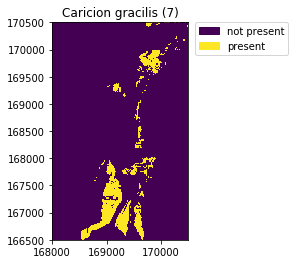

In [7]:
myniche.run()
myniche.plot(7)
plt.show()

In [8]:
z = fp.combine(myniche)
# fp._context.crs
#myniche._context.crs

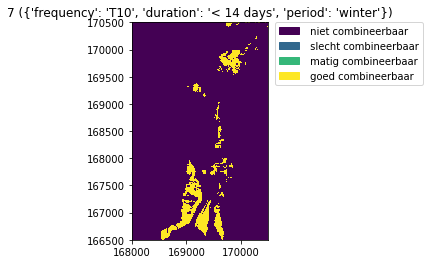

In [9]:
 
z.plot(7)
plt.show()